# **Exploratory** data analysis

In [ ]:
# Value Counts
value_counts = df['rating'].value_counts()

# Frequency Table (optional, but provides percentages)
frequency_table = (df['rating'].value_counts(normalize=True) * 100)

print("Value Counts:\n", value_counts)
print("\nFrequency Table:\n", frequency_table)

Value Counts:
 rating
TV-MA       2538
TV-14       1727
TV-PG        703
R            662
PG-13        386
PG           246
TV-Y         216
TV-Y7        195
TV-G         160
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64

Frequency Table:
 rating
TV-MA       36.418424
TV-14       24.781174
TV-PG       10.087530
R            9.499211
PG-13        5.538815
PG           3.529918
TV-Y         3.099440
TV-Y7        2.798106
TV-G         2.295882
NR           1.190989
G            0.559621
TV-Y7-FV     0.086096
UR           0.071746
NC-17        0.043048
Name: proportion, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Filter movies and TV shows
movies = df[df['type'] == 'Movie']
tvshows = df[df['type'] == 'TV Show']

# Value Counts for Movies
movie_value_counts = movies['rating'].value_counts()

# Frequency Table for Movies (optional)
movie_frequency_table = (movies['rating'].value_counts(normalize=True) * 100)

# Value Counts for TV Shows
tvshow_value_counts = tvshows['rating'].value_counts()

# Frequency Table for TV Shows (optional)
tvshow_frequency_table = (tvshows['rating'].value_counts(normalize=True) * 100)

print("Movie Rating Value Counts:\n", movie_value_counts)
print("\nMovie Rating Frequency Table:\n", movie_frequency_table)

print("\nTV Show Rating Value Counts:\n", tvshow_value_counts)
print("\nTV Show Rating Frequency Table:\n", tvshow_frequency_table)

Movie Rating Value Counts:
 rating
TV-MA       1809
TV-14       1250
R            661
TV-PG        490
PG-13        386
PG           246
TV-G         107
TV-Y         107
TV-Y7         85
NR            78
G             39
TV-Y7-FV       5
UR             5
NC-17          3
Name: count, dtype: int64

Movie Rating Frequency Table:
 rating
TV-MA       34.319863
TV-14       23.714665
R           12.540315
TV-PG        9.296149
PG-13        7.323089
PG           4.667046
TV-G         2.029975
TV-Y         2.029975
TV-Y7        1.612597
NR           1.479795
G            0.739898
TV-Y7-FV     0.094859
UR           0.094859
NC-17        0.056915
Name: proportion, dtype: float64

TV Show Rating Value Counts:
 rating
TV-MA       729
TV-14       477
TV-PG       213
TV-Y7       110
TV-Y        109
TV-G         53
NR            5
TV-Y7-FV      1
R             1
Name: count, dtype: int64

TV Show Rating Frequency Table:
 rating
TV-MA       42.932862
TV-14       28.091873
TV-PG       12.544170
TV-Y7 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


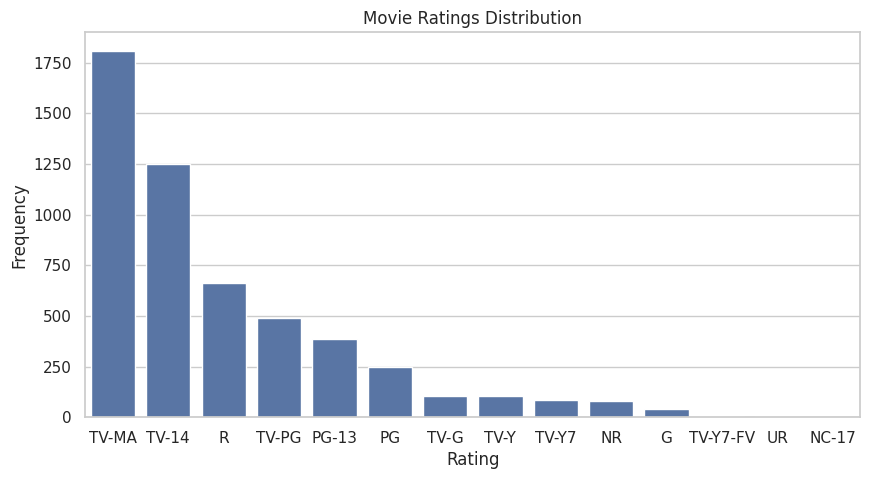

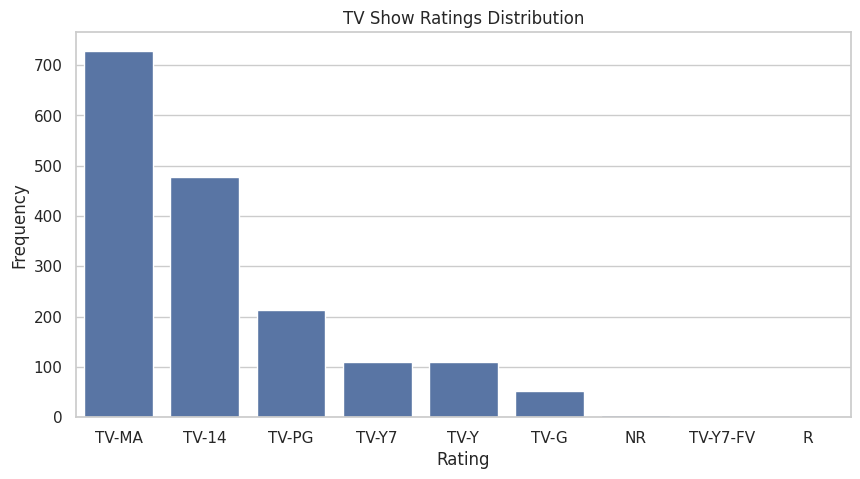

In [ ]:
# Plotting for Movies
plt.figure(figsize=(10, 5))
sns.barplot(x=movie_value_counts.index, y=movie_value_counts.values)
plt.title('Movie Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Plotting for TV Shows
plt.figure(figsize=(10, 5))

#Ensure that the cell where 'tvshow_value_counts' is defined has been run before running this cell
sns.barplot(x=tvshow_value_counts.index, y=tvshow_value_counts.values) # 'tvshow_value_counts', not 'tv_show_value_counts'

plt.title('TV Show Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


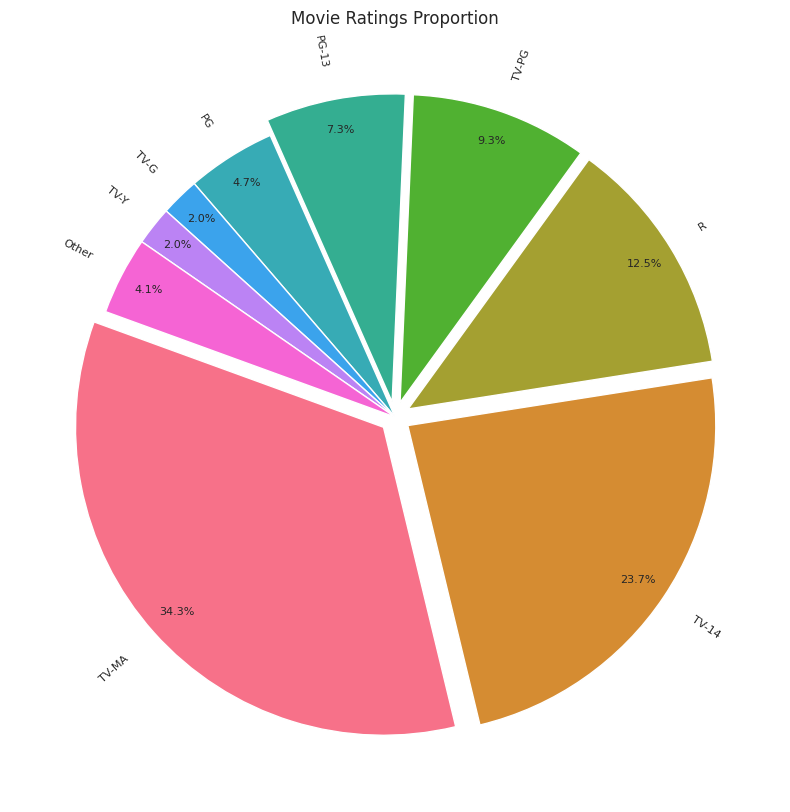

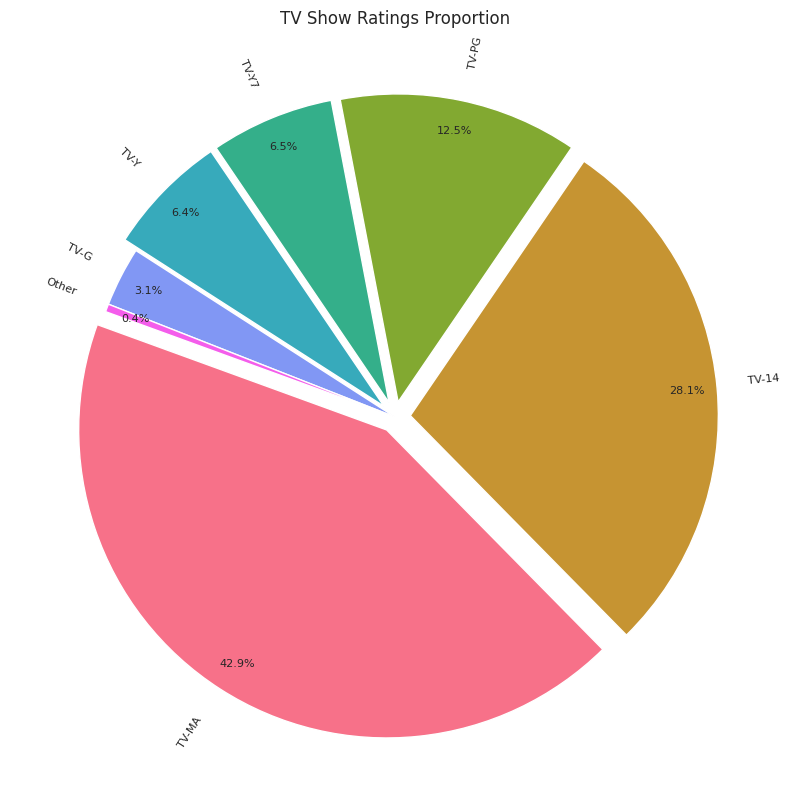

In [ ]:
# 2. Pie Charts for Movies and TV Shows

# Plotting for Movies
plt.figure(figsize=(10, 10))

# Define a threshold percentage to group less frequent categories
threshold_percentage = 2.0  # Adjust as needed

# Create a new Series for the pie chart data
movie_pie_data = movie_value_counts.copy()

# Group categories below the threshold into 'Other'
others = movie_pie_data[movie_pie_data / movie_pie_data.sum() * 100 < threshold_percentage]
movie_pie_data = movie_pie_data[movie_pie_data / movie_pie_data.sum() * 100 >= threshold_percentage]
movie_pie_data['Other'] = others.sum()

# Generate a color palette with enough colors for all slices (including 'Other')
colors = sns.color_palette('husl', n_colors=len(movie_pie_data))

# Explode slices for better visibility (adjust as needed)
explode = [0.05 if i < 5 else 0 for i in range(len(movie_pie_data))]

# Use smaller font size and adjust label distance
textprops = {'fontsize': 8}
pctdistance = 0.9

# Plot the pie chart with label rotation and adjusted startangle
wedges, _, labels = plt.pie(movie_pie_data.values, labels=movie_pie_data.index, autopct='%1.1f%%',
                            startangle=160, colors=colors, explode=explode, textprops=textprops,
                            pctdistance=pctdistance, rotatelabels=True)

plt.title('Movie Ratings Proportion')
plt.show()

# Plotting for TV Shows
plt.figure(figsize=(10, 10))

# Define a threshold percentage to group less frequent categories
threshold_percentage = 2.0  # Adjust as needed

# Create a new Series for the pie chart data
tvshow_pie_data = tvshow_value_counts.copy() # Changed 'tv_show_pie_data' to 'tvshow_pie_data'

# Group categories below the threshold into 'Other'
others = tvshow_pie_data[tvshow_pie_data / tvshow_pie_data.sum() * 100 < threshold_percentage] # Changed 'tv_show_pie_data' to 'tvshow_pie_data'
tvshow_pie_data = tvshow_pie_data[tvshow_pie_data / tvshow_pie_data.sum() * 100 >= threshold_percentage] # Changed 'tv_show_pie_data' to 'tvshow_pie_data'
tvshow_pie_data['Other'] = others.sum() # Changed 'tv_show_pie_data' to 'tvshow_pie_data'

# Generate a color palette with enough colors for all slices (including 'Other')
colors = sns.color_palette('husl', n_colors=len(tvshow_pie_data)) # Changed 'tv_show_pie_data' to 'tvshow_pie_data'

# Explode slices for better visibility (adjust as needed)
explode = [0.05 if i < 5 else 0 for i in range(len(tvshow_pie_data))] # Changed 'tv_show_pie_data' to 'tvshow_pie_data'

# Use smaller font size and adjust label distance
textprops = {'fontsize': 8}
pctdistance = 0.9

# Plot the pie chart with label rotation and adjusted startangle
wedges, _, labels = plt.pie(tvshow_pie_data.values, labels=tvshow_pie_data.index, autopct='%1.1f%%',  # Changed 'tv_show_pie_data' to 'tvshow_pie_data'
                            startangle=160, colors=colors, explode=explode, textprops=textprops,
                            pctdistance=pctdistance, rotatelabels=True)

plt.title('TV Show Ratings Proportion')
plt.show()

In [ ]:
# 1. Create a cross tabulation of `rating` and `type` columns and display it
cross_tab = pd.crosstab(df['rating'], df['type'])
print("Cross tabulation of rating and type:\n", cross_tab)

# 2. Create a grouped bar chart with `rating` on x-axis, count on y-axis and `type` as hue
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('rating:N', axis=alt.Axis(title='Rating')),
    y=alt.Y('count()', axis=alt.Axis(title='Count')),
    color='type:N',
    tooltip=['rating', 'type', 'count()']
)

# 3. Add appropriate labels and title
chart = chart.properties(
    title='Distribution of Ratings by Type'
).interactive()

# 4. Display the plot (save as JSON)
chart.save('rating_by_type_bar_chart.json')

# 5. Perform Chi-Square test of independence on `rating` and `type` and display the results
chi2, p, dof, expected = chi2_contingency(cross_tab)
print("\nChi-Square Test Results:")
print("Chi2 Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/altair/utils/schemapi.py:462: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature request (on referencing) if you are missing an API for the kind of customization you need.
  resolver = jsonschema.RefResolver.from_schema(cls._rootschema or cls._schema)
/usr/local/lib/python3.10/dist-packages/altair/utils/schemapi.py:462: DeprecationWarning: json

Cross tabulation of rating and type:
 type      Movie  TV Show
rating                  
G            39        0
NC-17         3        0
NR           78        5
PG          246        0
PG-13       386        0
R           661        1
TV-14      1250      477
TV-G        107       53
TV-MA      1809      729
TV-PG       490      213
TV-Y        107      109
TV-Y7        85      110
TV-Y7-FV      5        1
UR            5        0

Chi-Square Test Results:
Chi2 Statistic: 689.3732374807104
P-value: 6.4281121439284484e-139
Degrees of Freedom: 13


/usr/local/lib/python3.10/dist-packages/altair/utils/schemapi.py:462: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature request (on referencing) if you are missing an API for the kind of customization you need.
  resolver = jsonschema.RefResolver.from_schema(cls._rootschema or cls._schema)
/usr/local/lib/python3.10/dist-packages/altair/utils/schemapi.py:462: DeprecationWarning: jsonschema.RefResolver is deprecated as of v4.18.0, in favor of the https://github.com/python-jsonschema/referencing library, which provides more compliant referencing behavior as well as more flexible APIs for customization. A future release will remove RefResolver. Please file a feature request (on referencing) if you are missing an API for the kind of cu